# <left> Data Exploration with Boston Crimes Dataset<br> <small>EPITA<br>Rajan Singh</small> </center>

In [2]:
pip install dash==1.11.0

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly==4.6.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import libraries and dataset
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("crime.csv",encoding='ISO-8859-1')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [6]:
# To handle columns easily, convert them to lower case
columns = []
for each in data.columns:
    columns.append (each.lower())
data.columns = columns
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   incident_number      319073 non-null  object 
 1   offense_code         319073 non-null  int64  
 2   offense_code_group   319073 non-null  object 
 3   offense_description  319073 non-null  object 
 4   district             317308 non-null  object 
 5   reporting_area       319073 non-null  object 
 6   shooting             1019 non-null    object 
 7   occurred_on_date     319073 non-null  object 
 8   year                 319073 non-null  int64  
 9   month                319073 non-null  int64  
 10  day_of_week          319073 non-null  object 
 11  hour                 319073 non-null  int64  
 12  ucr_part             318983 non-null  object 
 13  street               308202 non-null  object 
 14  lat                  299074 non-null  float64
 15  long             

## Data Cleaning and Exploration :

In [7]:
print(data.sort_values(by=['occurred_on_date']).tail(1))
print(data.sort_values(by=['occurred_on_date']).head(1))
data.shooting.isnull().sum()#.to_frame().plot.bar()

  incident_number  offense_code offense_code_group offense_description  \
6      I182070933           724         Auto Theft          AUTO THEFT   

  district reporting_area shooting     occurred_on_date  year  month  \
6       B2            330      NaN  2018-09-03 21:25:00  2018      9   

  day_of_week  hour  ucr_part       street        lat       long  \
6      Monday    21  Part One  NORMANDY ST  42.306072 -71.082733   

                      location  
6  (42.30607218, -71.08273260)  
       incident_number  offense_code offense_code_group offense_description  \
129056      I172040657          2629         Harassment          HARASSMENT   

       district reporting_area shooting     occurred_on_date  year  month  \
129056      C11            397      NaN  2015-06-15 00:00:00  2015      6   

       day_of_week  hour  ucr_part        street        lat       long  \
129056      Monday     0  Part Two  MELBOURNE ST  42.291093 -71.065945   

                           location  
12

318054

### Observations:

1. I have used only the complete years 2017,2018 for this project.
2. Also narrow in on UCR Part Two offenses, which include only the most serious crimes.
3. A large number of data have 'Shooting' column empty implying that shooting did not occur. So need to fill it wit 'N'.
4. OCCURED_ON_DATE is string datatype, convert it to datetime type.

In [8]:
# Keep only data from complete years (2017, 2018)
data = data.loc[data['year'].isin([2017,2018])]

# Use UCR Part One offenses which include only the most serious crimes.
data = data.loc[data['ucr_part'] == 'Part Two']
data.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
13,I182070922,2647,Other,THREATS TO DO BODILY HARM,B3,429,NaN,2018-09-03 20:39:00,2018,9,Monday,20,Part Two,WOODROW AVE,42.286470,-71.087147,"(42.28647012, -71.08714661)"
18,I182070917,2647,Other,THREATS TO DO BODILY HARM,B2,901,NaN,2018-09-03 19:52:00,2018,9,Monday,19,Part Two,HORADAN WAY,42.333717,-71.096658,"(42.33371742, -71.09665806)"
27,I182070904,802,Simple Assault,ASSAULT SIMPLE - BATTERY,C11,242,NaN,2018-09-03 18:34:00,2018,9,Monday,18,Part Two,ANNAPOLIS ST,42.317319,-71.061509,"(42.31731905, -71.06150882)"
28,I182070904,2007,Restraining Order Violations,VIOL. OF RESTRAINING ORDER W NO ARREST,C11,242,NaN,2018-09-03 18:34:00,2018,9,Monday,18,Part Two,ANNAPOLIS ST,42.317319,-71.061509,"(42.31731905, -71.06150882)"


In [9]:
# Drop the rows in the dataset where 'District' column is empty.
data = data.dropna(subset=['district'])
data = data[data['lat'] > 40]

# Filling 'Shooting' column with 'N' if its empty --> implying that there was no shooting.
data.shooting.fillna('No', inplace=True)

data.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
1,I182070943,1402,Vandalism,VANDALISM,C11,347,No,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
13,I182070922,2647,Other,THREATS TO DO BODILY HARM,B3,429,No,2018-09-03 20:39:00,2018,9,Monday,20,Part Two,WOODROW AVE,42.286470,-71.087147,"(42.28647012, -71.08714661)"
18,I182070917,2647,Other,THREATS TO DO BODILY HARM,B2,901,No,2018-09-03 19:52:00,2018,9,Monday,19,Part Two,HORADAN WAY,42.333717,-71.096658,"(42.33371742, -71.09665806)"
27,I182070904,802,Simple Assault,ASSAULT SIMPLE - BATTERY,C11,242,No,2018-09-03 18:34:00,2018,9,Monday,18,Part Two,ANNAPOLIS ST,42.317319,-71.061509,"(42.31731905, -71.06150882)"
28,I182070904,2007,Restraining Order Violations,VIOL. OF RESTRAINING ORDER W NO ARREST,C11,242,No,2018-09-03 18:34:00,2018,9,Monday,18,Part Two,ANNAPOLIS ST,42.317319,-71.061509,"(42.31731905, -71.06150882)"


## Data Visualization

In [10]:
#

In [11]:
# Convert OCCURED_ON_DATE to datetime
data['occurred_on_date'] = pd.to_datetime(data['occurred_on_date'])

# Remove unused columns
data = data.drop(['offense_code','ucr_part','location', 'offense_description','street'], axis=1)

data.head()

,incident_number,offense_code_group,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,lat,long
1,I182070943,Vandalism,C11,347,No,2018-08-21 00:00:00,2018,8,Tuesday,0,42.306821,-71.060300
13,I182070922,Other,B3,429,No,2018-09-03 20:39:00,2018,9,Monday,20,42.286470,-71.087147
18,I182070917,Other,B2,901,No,2018-09-03 19:52:00,2018,9,Monday,19,42.333717,-71.096658
27,I182070904,Simple Assault,C11,242,No,2018-09-03 18:34:00,2018,9,Monday,18,42.317319,-71.061509
28,I182070904,Restraining Order Violations,C11,242,No,2018-09-03 18:34:00,2018,9,Monday,18,42.317319,-71.061509


#### serious crimes
Let's start by checking the frequency of different types of crimes. Since I have subsetted to only 'serious' crimes of part two, there are only 29 different types of offenses - much more manageable than the 67 we started with.

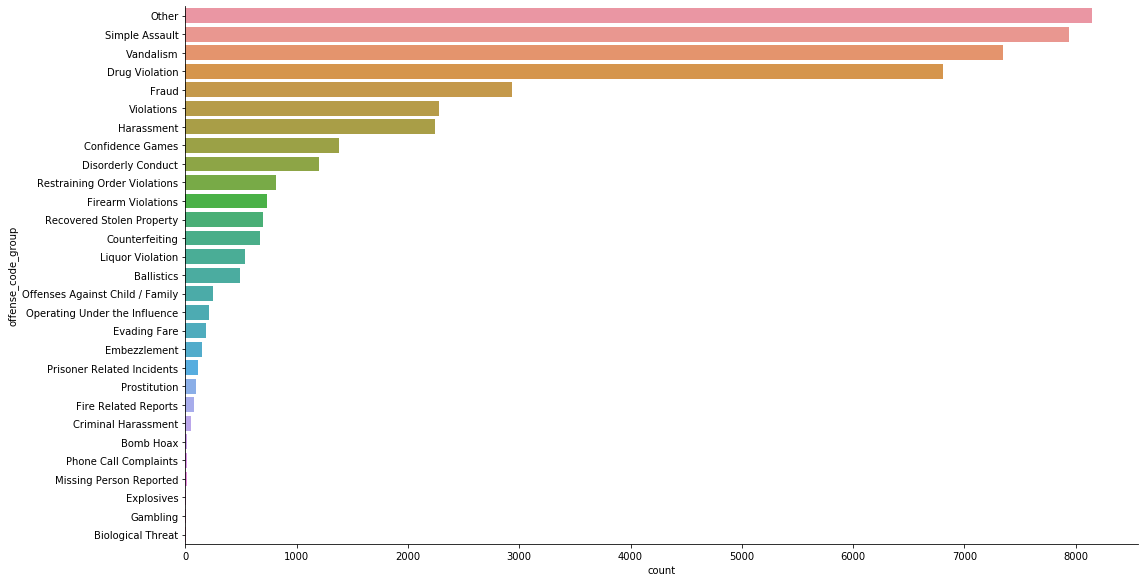

In [12]:
sns.catplot(y='offense_code_group', kind='count', height=8, aspect=2,order=data.offense_code_group.value_counts().index,
            data=data)

<b>Simple assault is by far the most common serious crime, and homicides are pretty rare.

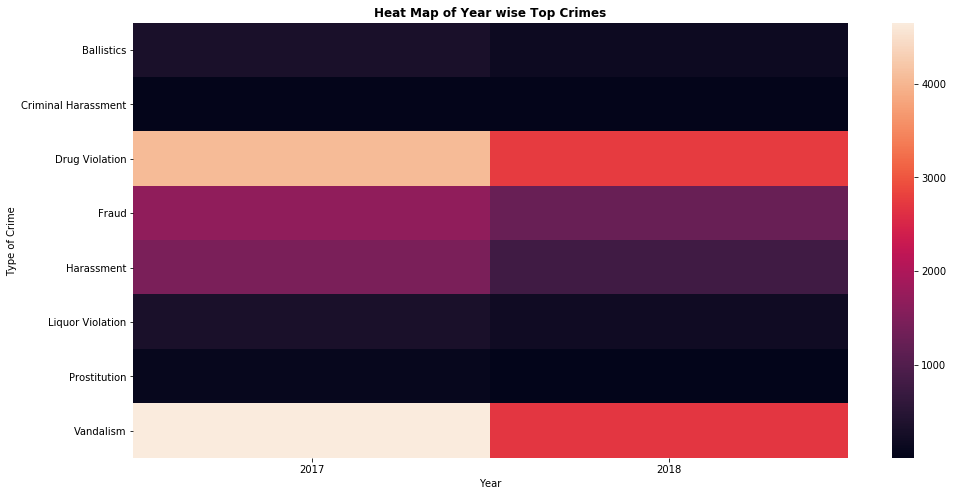

In [13]:
# Plot some crimes in different years 2017 and 2018
plt.figure(figsize=(16,8))
topweeks = data[(data['offense_code_group'] == 'Vandalism') |
                (data['offense_code_group'] == 'Drug Violation') |
                (data['offense_code_group'] == 'Harassment') |
                (data['offense_code_group'] == 'Liquor Violation') |
                (data['offense_code_group'] == 'Offenses Against Child/Family') |
                (data['offense_code_group'] == 'Prostitution') |
                (data['offense_code_group'] == 'Criminal Harassment') |
                (data['offense_code_group'] == 'Fraud') |
                (data['offense_code_group'] == 'Ballistics')]
#data['occurred_on_date'] = pd.to_datetime(data['occurred_on_date'])
topweeks = topweeks.pivot_table(values = 'incident_number', index = 'offense_code_group', columns = 'year', aggfunc = np.size)
topweeks
sns.heatmap(topweeks)
plt.xlabel('Year')
plt.ylabel('Type of Crime')
plt.title('Heat Map of Year wise Top Crimes',fontsize=12,fontweight="bold")
plt.show()

<b> The number of top crimes shows little or no change in both years 2017 and 2018.

#### Where does serious crimes occur?
We can use the latitude and longitude columns to plot the location of crimes in Boston. By setting the alpha parameter to a very small value, we can see that there are some crime 'hotspots'.

              lat       long
1       42.306821 -71.060300
13      42.286470 -71.087147
18      42.333717 -71.096658
27      42.317319 -71.061509
28      42.317319 -71.061509
...           ...        ...
318913  42.275313 -71.115878
318914  42.275313 -71.115878
318915  42.275313 -71.115878
319031  42.330013 -71.091179
319066  42.322838 -71.100967

[45421 rows x 2 columns]


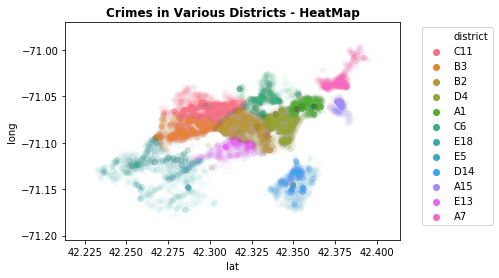

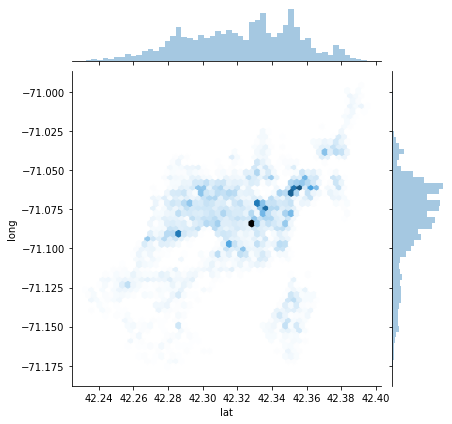

In [14]:
# Plotting the districts with Latitude and Longitude
sns.scatterplot(x='lat',y='long',hue='district',alpha=0.01,data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

location_shoot = data[['lat','long']]
location_shoot = location_shoot.dropna()
print(location_shoot)

location_shoot = location_shoot.loc[(location_shoot['lat']>40) & (location_shoot['long'] < -60)]  
x = location_shoot['long']
y = location_shoot['lat']
plt.title("Crimes in Various Districts - HeatMap",fontsize=12,fontweight="bold")
sns.jointplot(y, x, kind='hex')

<b>It can be associated that high crime rates within particular districts, most noteably D4 and B2, which correspond to the most crowded areas of downtown Boston.

Text(0.5, 0.98, 'Crimes in Various Districts in 2017 & 2018')

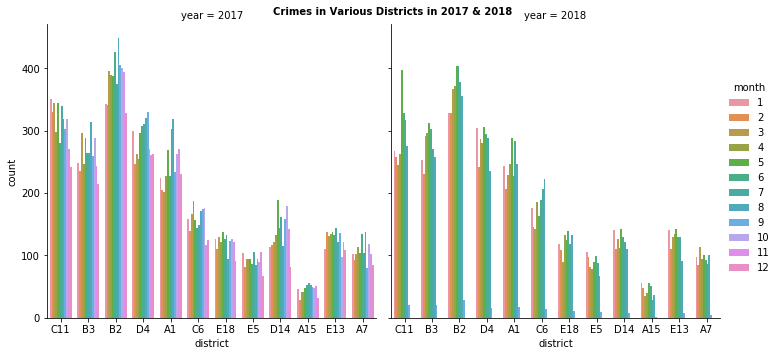

In [64]:
# Plotting crimes district wise in 2017 and 2018
g = sns.catplot(x="district", hue="month", col="year", data=data, kind="count")
g.fig.suptitle("Crimes in Various Districts in 2017 & 2018", fontsize=10,fontweight="bold")

<b> It can be observered from this the crime rates at each district remains almost the same in both years. Also it can be seen again that c11 and B2 have the highest crime rates and A15 has the lowest.

Now the rest of the observations will be based on 2 different types of crimes - Crimes which had shooting and crimes which did not.

In [69]:
# Split data into shooting and non-shooting
data_shooting = data.loc[data['shooting'] == 'Y']
data_non_shooting = data.loc[data['shooting'] != 'Y']

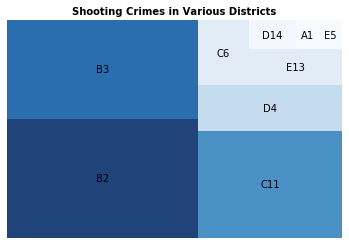

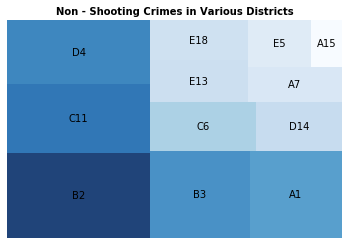

In [71]:
import squarify # pip install squarify (algorithm for treemap)
import matplotlib

# To plot Shooting Crimes in Various Districts based on count
norm = matplotlib.colors.Normalize(vmin=min(data_shooting.district.value_counts()), vmax=max(data_shooting.district.value_counts()))
colors = [matplotlib.cm.Blues(norm(value)) for value in data_shooting.district.value_counts()]

sizes = data_shooting.district.value_counts()
labels = data_shooting.district.value_counts().index

squarify.plot(sizes=sizes, label=labels, color = colors, alpha=.9 )
plt.title("Shooting Crimes in Various Districts",fontsize=10,fontweight="bold")
plt.axis('off')
plt.show()

# To plot Non - Shooting Crimes in Various Districts
norm = matplotlib.colors.Normalize(vmin=min(data_non_shooting.district.value_counts()), vmax=max(data_non_shooting.district.value_counts()))
colors = [matplotlib.cm.Blues(norm(value)) for value in data_non_shooting.district.value_counts()]

sizes = data_non_shooting.district.value_counts()
labels = data_non_shooting.district.value_counts().index

squarify.plot(sizes=sizes, label=labels, color = colors, alpha=.9 )
plt.title("Non - Shooting Crimes in Various Districts",fontsize=10,fontweight="bold")
plt.axis('off')
plt.show()


<b> District A15 has the least number of shooting and non shooting crimes. 
<b> B2 is the highest Shooting Crimes and 2nd highest non shooting crimes. D4 has the highest number of non shooting crimes.



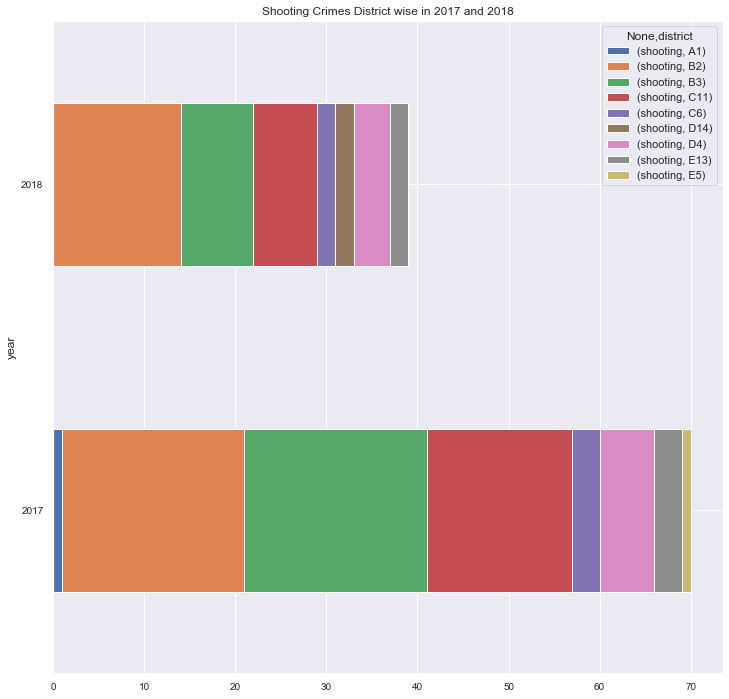

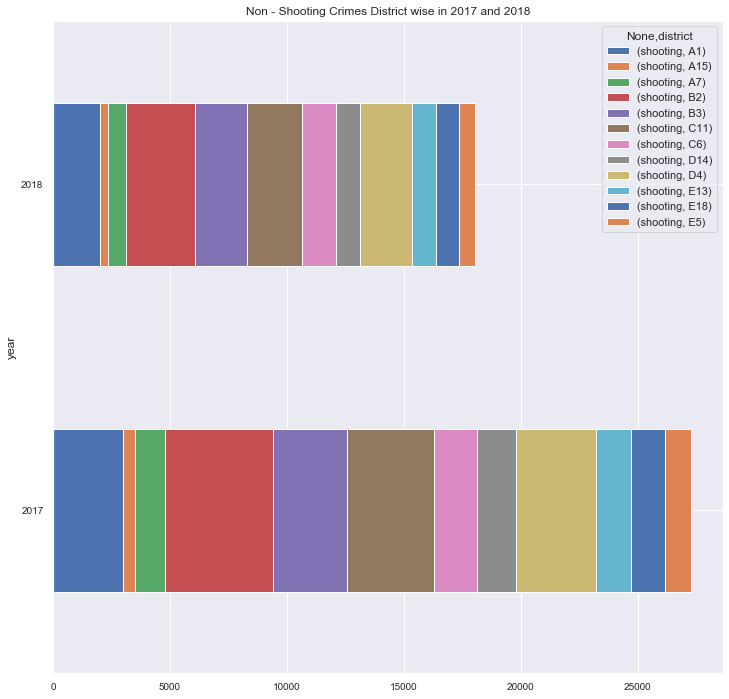

In [72]:
# Barplot year wise for shooting and non shooting crimes district-wise.
shootcrime=pd.pivot_table(data.loc[data['shooting']=='Y',['year','district','shooting']], \
               index='year',columns='district',aggfunc=np.count_nonzero)
sns.set()
shootcrime.plot(title=r'Shooting Crimes District wise in 2017 and 2018',fontsize=10,figsize=(12,12),kind='barh',stacked=True)
plt.show()

shootcrime=pd.pivot_table(data.loc[data['shooting']=='No',['year','district','shooting']], \
               index='year',columns='district',aggfunc=np.count_nonzero)
sns.set()
shootcrime.plot(title=r'Non - Shooting Crimes District wise in 2017 and 2018',fontsize=10,figsize=(12,12),kind='barh',stacked=True)
plt.show()

<b> Again it can be seen that the frequency of crimes remain somewhat unchanged in both years. Also B2 has high shooting and non-shooting crimes followed by D14, and A15 has the lowest crime rates.

### When do serious crimes occur?
We can consider patterns across several different time scales: hours of the day, days of the week, and months of the year.

<Figure size 1152x576 with 0 Axes>

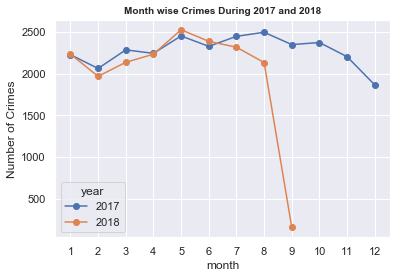

In [99]:
# Plotting number of crimes month-wise in 2017 and 2018
plt.figure(figsize=(16,8))
data.groupby(['month', 'year'])['incident_number'].count().unstack().plot(marker = 'o')
plt.xticks(np.arange(1,13))
plt.ylabel('Number of Crimes')
plt.title('Month wise Crimes During 2017 and 2018',fontsize=10,fontweight="bold")
plt.show()

<b> An observation is that pattern of crimes month-wise is somewhat similar in the years 2017 and 2018 but suddenly drops down during the winter time in 2018

Text(-0.16499999999999915, 0.5, 'Count')

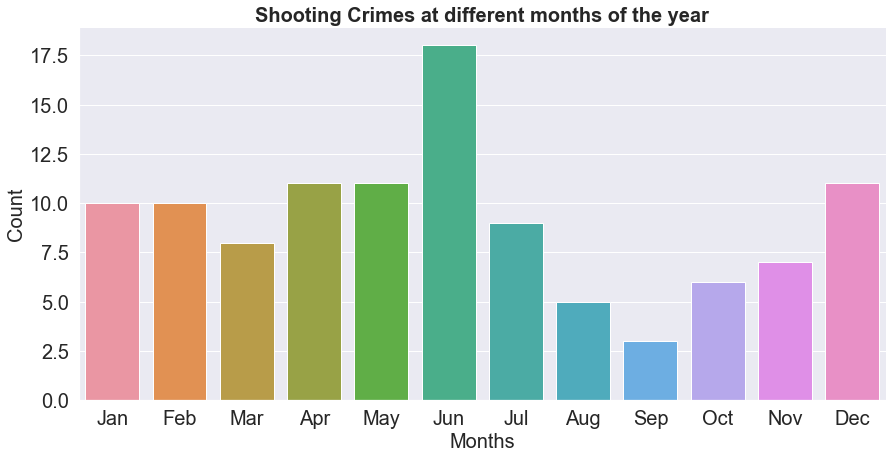

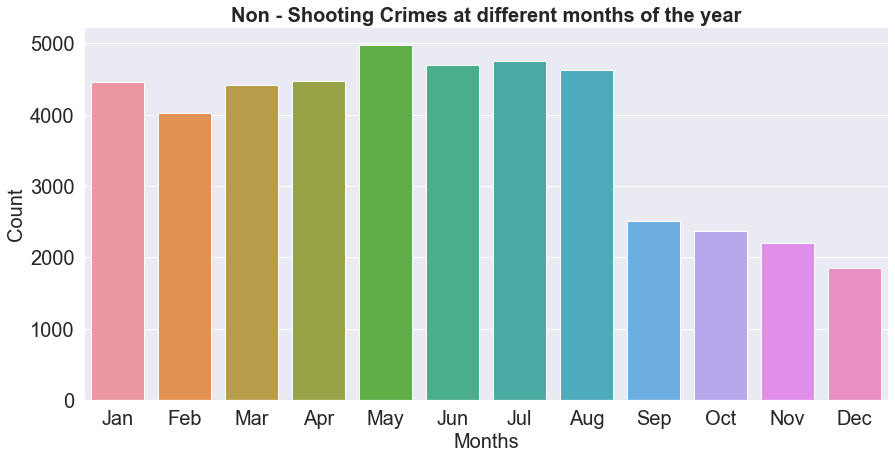

In [101]:
# Plotting crimes Month-wise
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.catplot(x='month', kind='count',height=6, aspect=2, data=data_shooting)

plt.xticks(np.arange(12), months, size=20)
plt.yticks(size=20)
plt.title("Shooting Crimes at different months of the year",fontsize=20,fontweight="bold")
plt.xlabel('Months', fontsize=20)
plt.ylabel('Count', fontsize=20)

sns.catplot(x='month', kind='count', height=6, aspect=2, data=data_non_shooting)

plt.xticks(np.arange(12), months, size=20)
plt.yticks(size=20)
plt.title("Non - Shooting Crimes at different months of the year",fontsize=20,fontweight="bold")
plt.xlabel('Months', fontsize=20)
plt.ylabel('Count', fontsize=20)

<b> It can be observed that the month of June has the highest number of shooting crimes and September has the least. For non shooting crimes May has highest crimes and November and December have the least.
<br> Also it can be observed that the frequency of non shooting crimes are somewhat same throughout the year and declines after August but for shooting crimes its varies over the months.
<br> This means that more number of serious crimes (both shooting and non-shooting) are committed during the summers of Boston(June, July, August) and lesser during spring(February, March).

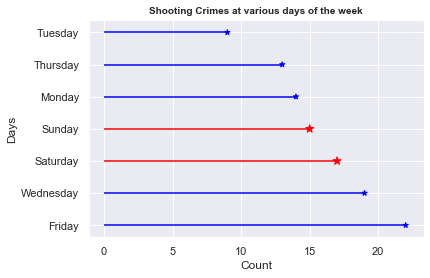

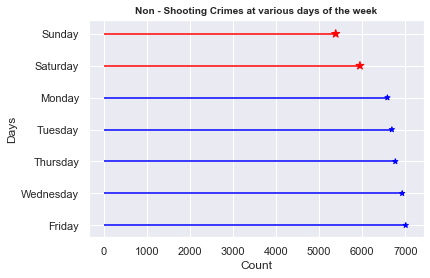

In [102]:
# Plotting crimes week-wise
my_range=range(7)

my_color1=np.where(data_shooting['day_of_week'].value_counts().index.isin(['Saturday','Sunday']), 'red', 'blue')
my_color2=np.where(data_non_shooting['day_of_week'].value_counts().index.isin(['Saturday','Sunday']), 'red', 'blue')
my_size1=np.where(data_shooting['day_of_week'].value_counts().index.isin(['Saturday','Sunday']), 70, 30)
my_size2=np.where(data_non_shooting['day_of_week'].value_counts().index.isin(['Saturday','Sunday']), 70, 30)


plt.hlines(y=my_range, xmin=0, xmax=data_shooting['day_of_week'].value_counts(), color=my_color1)
plt.scatter(data_shooting['day_of_week'].value_counts(), my_range, color=my_color1, s=my_size1, alpha=1, marker = '*')
plt.yticks(my_range, data_shooting['day_of_week'].value_counts().index)
plt.title("Shooting Crimes at various days of the week",fontsize=10,fontweight="bold")
plt.xlabel('Count')
plt.ylabel('Days')
plt.show()

plt.hlines(y=my_range, xmin=0, xmax=data_non_shooting.day_of_week.value_counts(), color=my_color2)
plt.scatter(data_non_shooting['day_of_week'].value_counts(), my_range, color=my_color2, s=my_size2, alpha=1, marker = '*')

plt.yticks(my_range, data_non_shooting['day_of_week'].value_counts().index)
plt.title("Non - Shooting Crimes at various days of the week",fontsize=10,fontweight="bold")
plt.xlabel('Count')
plt.ylabel('Days')
plt.show()

<b> It can be seen that shooting crimes takes place mostly on Wednesday and Friday with highest on Friday. 
<br> Whereas non-shooting crimes tend to take place more on the weekdays with the highest being on Fridays.

In [ ]:
# Categorising the hour-wise data into groups
def days_late_xform(x):    
    if x < 3:
        return 'Midnight'
    elif 3 <= x < 7:
        return 'Early Morning'
    elif 7 <= x < 11:
        return 'Morning'
    elif 11 <= x < 15:
        return 'Noon'
    elif 15 <= x < 18:
        return 'Evening'
    elif 18 <= x < 21:
        return 'Night'
    else:
        return 'Late Night'
    
data_non_shooting['day_split'] = data_non_shooting['hour'].map(days_late_xform)
data_shooting['day_split'] = data_shooting['hour'].map(days_late_xform)


<b> I have Categorised the Data from 12 am to 2am as Midnight and till 6am as Early Morning and upto 10 am as Morning and till 2pm as Noon and till 5 pm as Evening and till 8 pm as Night and till 12 am as Late Night.

Text(0.5, 1, 'Non - Shooting Crimes at various times of the day')

<Figure size 720x756 with 0 Axes>

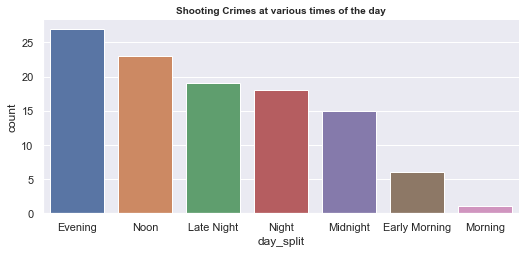

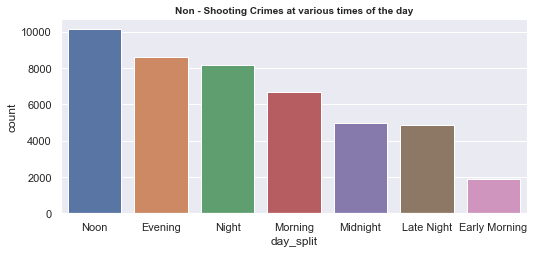

In [78]:
# Plotting crimes at various times of the day
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10.5)

sns.catplot(x='day_split', kind='count', height=8, aspect=1.5, order=data_shooting.day_split.value_counts().index, data=data_shooting)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(7, 3)
plt.title("Shooting Crimes at various times of the day",fontsize=10,fontweight="bold")

sns.catplot(x='day_split', kind='count', height=8, aspect=1.5, order=data_non_shooting.day_split.value_counts().index, data=data_non_shooting)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(7, 3)
plt.title("Non - Shooting Crimes at various times of the day",fontsize=10,fontweight="bold")

<b>It is clear that most shooting crimes occurs at night(between 6pm and 2am).
In contrast, it can be seen that most non shooting crimes occur during the day (from 10am to 6pm).</b>

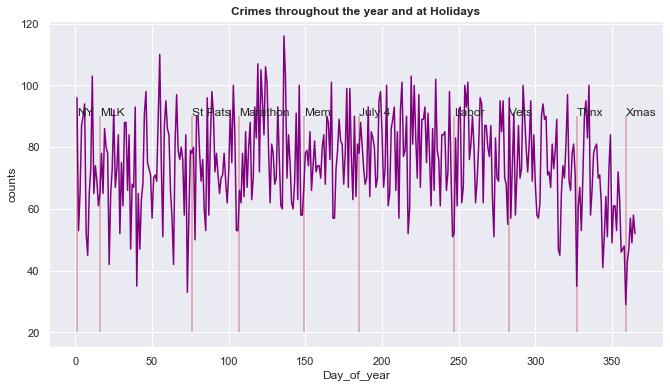

In [80]:
# To check if crimes are affected by holidays
data['Day_of_year'] = data.occurred_on_date.dt.dayofyear
data_holidays = data[data.year == 2017].groupby(['Day_of_year']).size().reset_index(name='counts')
# Dates of major U.S. holidays in 2017
holidays = pd.Series(['2017-01-01', # New Years Day
                     '2017-01-16', # MLK Day
                     '2017-03-17', # St. Patrick's Day
                     '2017-04-17', # Boston marathon
                     '2017-05-29', # Memorial Day
                     '2017-07-04', # Independence Day
                     '2017-09-04', # Labor Day
                     '2017-10-10', # Veterans Day
                     '2017-11-23', # Thanksgiving
                     '2017-12-25']) # Christmas
holidays = pd.to_datetime(holidays).dt.dayofyear
holidays_names = ['NY',
                 'MLK',
                 'St Pats',
                 'Marathon',
                 'Mem',
                 'July 4',
                 'Labor',
                 'Vets',
                 'Thnx',
                 'Xmas']

import datetime as dt
# Plot crimes and holidays
fig, ax = plt.subplots(figsize=(11,6))
sns.lineplot(x='Day_of_year',
             y='counts',
             ax=ax,
             color = 'purple',
             data=data_holidays)
plt.title("Crimes throughout the year and at Holidays",fontsize=12,fontweight="bold")
plt.vlines(holidays, 20, 90, alpha=0.5, color ='r')
for i in range(len(holidays)):
    plt.text(x=holidays[i], y=90, s=holidays_names[i])

<b> Many of these holidays appear to line up with especially low crime rates, particularly Thanksgiving and Christmas. Of course, this is data from just a single year, and detecting an association between a given holiday and crime rates would require a lot more data and a model that accounts for other factors. However, this does cause me to question the general idea that crime increases surrounding holidays - that isn't true. Even the entire "holiday season" from Thanksgiving to Christmas doesn't seem to be especially elevated compared to the summer.


### Conclusions:

1. Simple Assault is by far the most common Part Two crime, and Biological threat are pretty rare in Boston.
2. B2 and D4 are the most dangerous districts and A15 is the safest.
3. There is no considerable increase or decrease in the number of crimes each year.
4. Crime rate is higher during the summer as compared to winter.
5. Shooting crimes are more often during the wednesday and Friday whereas non-shooting crimes are least during the weekends.
6. Night time (between 6pm and 2am) shows the highest shooting crimes whereas non-shooting crimes take place more during the day (between 10am and 6pm).
7. The notion of holidays leading to higher crime rates is not true.
8. Thus summer weekend nights (for shooting crimes) and summer weekdays during the day (for non-shooting crime) are the most dangerous times, especially in District B2 and D4.